In [11]:
from fenics import *
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from mshr import Rectangle, Circle, generate_mesh

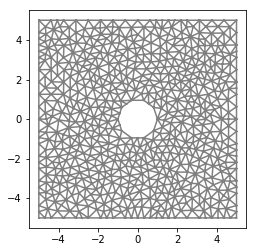

In [21]:
T = 0.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
lx = ly = 5.0
R = 1.0

# Define 2D geometry
domain = Rectangle(Point(-lx,-ly), Point(lx, ly))
well = Circle(Point(0, 0), R)


# Generate and plot mesh
mesh = generate_mesh(domain - well, 20)
plot(mesh, "2D mesh")

In [22]:
V = FunctionSpace(mesh, 'P', 1)

In [ ]:
# Define boundary condition 
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
#vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u)

    # Update previous solution
u_n.assign(u)